In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#Question 5
#Gathering data on AMD stock price from 2013-2015
amd2013 = web.DataReader("AMD",  "yahoo", datetime(2013,1,1), datetime(2013,12,31))
amd2014 = web.DataReader("AMD",  "yahoo", datetime(2014,1,1), datetime(2014,12,31))
amd2015 = web.DataReader("AMD",  "yahoo", datetime(2015,1,1), datetime(2015,12,31))

amd2013.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,2.57,2.45,2.55,2.53,27214800,2.53
2013-01-03,2.59,2.46,2.52,2.49,24966900,2.49
2013-01-04,2.59,2.49,2.51,2.59,22054200,2.59
2013-01-07,2.70,2.60,2.61,2.67,25575200,2.67
2013-01-08,2.76,2.64,2.72,2.67,29140800,2.67


In [3]:
#Part a
#AMD 2013 stock prices
t = amd2013.index

n2013 = len(t) - 1
stockPrice2013 = amd2013["Adj Close"]
returns2013 = np.zeros(n2013)

for i in range(1, n2013):
    returns2013[i] = (stockPrice2013[i] - stockPrice2013[i-1])/(stockPrice2013[i-1])
    
print("AMD 2013 daily returns")
print(returns2013)
    
#AMD 2014 stock prices
t = amd2014.index

n2014 = len(t) - 1
stockPrice2014 = amd2014["Adj Close"]

returns2014 = np.zeros(n2014)

for i in range(1, n2014):
    returns2014[i] = (stockPrice2014[i] - stockPrice2014[i-1])/(stockPrice2014[i-1])
    
print("AMD 2014 daily returns")    
print(returns2014)

#AMD 2015 stock prices
t = amd2015.index

n2015 = len(t) - 1
stockPrice2015 = amd2015["Adj Close"]

returns2015 = np.zeros(n2015)

for i in range(1, n2015):
    returns2015[i] = (stockPrice2015[i] - stockPrice2015[i-1])/(stockPrice2015[i-1])
    
print("AMD 2015 daily returns")    
print(returns2015)

AMD 2013 daily returns
[ 0.         -0.01581026  0.0401606   0.03088809  0.         -0.01498126
 -0.00380237  0.01908404 -0.01123594  0.0151515   0.01492536  0.00735293
 -0.10218977 -0.00406504  0.1142857   0.021978    0.02150536 -0.01052631
 -0.02836877 -0.03284668 -0.018868    0.         -0.0307692   0.031746
  0.         -0.01153845  0.00778209  0.03088809  0.03745315 -0.00722021
  0.         -0.01454544  0.04059037 -0.04255315 -0.03703709  0.00384615
 -0.03065131 -0.02766796  0.02845526 -0.01581026 -0.02811242 -0.00826445
  0.01249999  0.          0.04938267  0.00392156  0.01171874  0.007722
 -0.00383141  0.01153854 -0.01140692  0.01923084  0.00754716  0.02996252
 -0.03999996 -0.03787884 -0.01181101  0.01195218  0.003937    0.
 -0.04313721 -0.02049178 -0.02928877  0.00431034 -0.01716737  0.13100435
  0.01544409 -0.00760465 -0.03448273 -0.015873   -0.03225803  0.01666665
 -0.01639343  0.04583329 -0.01593624 -0.00404858  0.02845526  0.03162052
  0.02681999 -0.01492536  0.0151515   0.

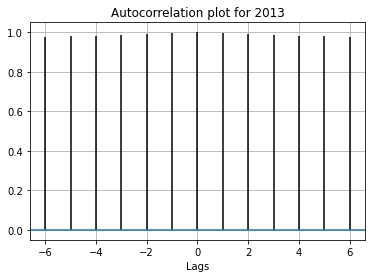

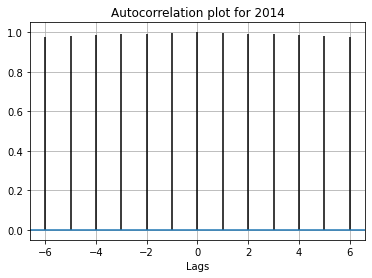

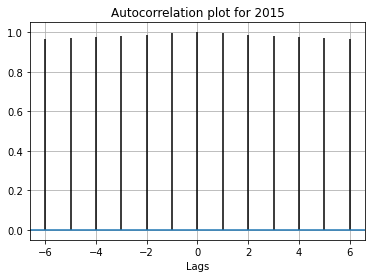

In [4]:
#Part b
#We find that the values for all time lags for each year is about 1
#This means that the stock price for each year increases over time
#Year 2013
plt.title("Autocorrelation plot for 2013")
plt.xlabel("Lags")
plt.acorr(stockPrice2013, maxlags = 6)
plt.grid(True)
plt.show()

#Year 2014
plt.title("Autocorrelation plot for 2014")
plt.xlabel("Lags")
plt.acorr(stockPrice2014, maxlags = 6)
plt.grid(True)
plt.show()

#Year 2015
plt.title("Autocorrelation plot for 2015")
plt.xlabel("Lags")
plt.acorr(stockPrice2015, maxlags = 6)
plt.grid(True)
plt.show()

In [5]:
#Part c
#Variances of the returns
v1 = np.zeros(3)
#Excluding the first day, whose return is always zero
v1[0] = np.std(returns2013)**2
v1[1] = np.std(returns2014)**2
v1[2] = np.std(returns2015)**2
print(v1)

[0.00102268 0.00065255 0.00121893]


In [6]:
#Part d
#Variances of 2-day returns 
#2013
twoDayreturns2013 = np.zeros(n2013)

for i in range(2, n2013):
    twoDayreturns2013[i] = (stockPrice2013[i] - stockPrice2013[i-2])/(stockPrice2013[i-2])

print("Two day returns for 2013:")
print(twoDayreturns2013[2:])

#2014
twoDayreturns2014 = np.zeros(n2014)

for i in range(2, n2013):
    twoDayreturns2014[i] = (stockPrice2014[i] - stockPrice2014[i-2])/(stockPrice2014[i-2])

print("Two day returns for 2014:")
print(twoDayreturns2014[2:])

#2015
twoDayreturns2015 = np.zeros(n2015)

for i in range(2, n2015):
    twoDayreturns2015[i] = (stockPrice2015[i] - stockPrice2015[i-2])/(stockPrice2015[i-2])

print("Two day returns for 2015:")
print(twoDayreturns2015[2:])

#Variances
v2 = np.zeros(3)
#Excluding the first two days, whose returns are always zero
v2[0] = np.std(twoDayreturns2013)**2
v2[1] = np.std(twoDayreturns2014)**2
v2[2] = np.std(twoDayreturns2015)**2
print(v2)

Two day returns for 2013:
[ 0.02371539  0.07228918  0.03088809 -0.01498126 -0.01872666  0.01520911
  0.00763367  0.00374531  0.030303    0.02238804 -0.09558823 -0.1058394
  0.10975609  0.13877547  0.043956    0.01075268 -0.03859646 -0.06028363
 -0.05109493 -0.018868   -0.0307692   0.          0.031746   -0.01153845
 -0.00384615  0.03891056  0.0694981   0.02996252 -0.00722021 -0.01454544
  0.02545452 -0.00369003 -0.0780142  -0.03333339 -0.02692305 -0.05747121
  0.          0.01219511 -0.04347822 -0.03614454  0.00413223  0.01249999
  0.04938267  0.05349789  0.01568626  0.01953123  0.003861    0.00766292
  0.          0.00760456  0.02692314  0.03773581 -0.01123594 -0.07636365
 -0.04924247  0.          0.01593624  0.003937   -0.04313721 -0.06274504
 -0.04918038 -0.02510468 -0.01293102  0.11158798  0.14847168  0.007722
 -0.04182514 -0.04980838 -0.047619   -0.01612902  0.          0.0286885
  0.02916664 -0.0199203   0.02429147  0.06097555  0.05928858  0.01149433
  0.          0.06818175  0.2

In [7]:
#Part e
#We see that the variance ratios are about 1 for each year
vr = v2/(2*v1)
print(vr)

[1.09497493 1.12617497 1.02098253]
